In [1]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import networkx as nx

In [2]:
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/neuroethology/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [3]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#from avgn.utils.general import save_fig
#from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [5]:
#%matplotlib notebook

In [6]:
data, cluster_id = sklearn.datasets.make_blobs(n_samples = 20, n_features = 3, random_state=1, cluster_std=3)

In [23]:
from sklearn.manifold import MDS

In [25]:
MDS_embedding = MDS().fit_transform(data)

In [7]:
umap_object = umap.UMAP(n_neighbors=5, min_dist=.25).fit(data)

In [50]:
umap_object_mds = umap.UMAP(n_neighbors=len(data)-1, min_dist=.25, verbose=True).fit(data)

UMAP(dens_frac=0.0, dens_lambda=0.0, min_dist=0.25, n_neighbors=19,
     verbose=True)
Construct fuzzy simplicial set
Thu Jul 22 21:03:21 2021 Finding Nearest Neighbors
Thu Jul 22 21:03:21 2021 Finished Nearest Neighbor Search
Thu Jul 22 21:03:21 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Jul 22 21:03:26 2021 Finished embedding


In [8]:
points = umap_object.embedding_

In [53]:
# create dataframe of edges
coo_graph_mds = umap_object_mds.graph_.tocoo()
edge_df_mds = pd.DataFrame(
        np.vstack([coo_graph_mds.row, coo_graph_mds.col, coo_graph_mds.data]).T,
        columns=("source", "target", "weight"),
    )
edge_df_mds["source"] = edge_df_mds.source.astype(np.int32)
edge_df_mds["target"] = edge_df_mds.target.astype(np.int32)

In [9]:
# create dataframe of edges
coo_graph = umap_object.graph_.tocoo()
edge_df = pd.DataFrame(
        np.vstack([coo_graph.row, coo_graph.col, coo_graph.data]).T,
        columns=("source", "target", "weight"),
    )
edge_df["source"] = edge_df.source.astype(np.int32)
edge_df["target"] = edge_df.target.astype(np.int32)

In [10]:
edge_df[:3]

,source,target,weight
0,0,1,0.569978
1,0,9,0.397779
2,0,18,0.606066


In [11]:
# get estimate of initial spectral embedding
network_graph = nx.Graph()
network_graph.add_weighted_edges_from([(row.source, row.target, row.weight) for idx, row in edge_df.iterrows()])
spectral_embedding = list(pd.DataFrame(nx.spectral_layout(network_graph)).T.sort_index().values)

In [12]:
# create a random intitial embedding for visualization purposes
random_embedding = np.random.rand(np.shape(points)[0], np.shape(points)[1])

In [28]:
# creata dataframe of points and embeddings
point_df = pd.DataFrame()
point_df['data_'] = list(data)
point_df['embedding'] = list(points)
point_df['label'] = list(cluster_id)
point_df['spectral_embedding'] = list(spectral_embedding)
point_df['random_embedding'] = list(random_embedding)
point_df['MDS_embedding'] = list(MDS_embedding)


In [29]:
point_df[:3]

,data_,embedding,label,spectral_embedding,random_embedding,MDS_embedding
0,"[-0.05812716910083182, 4.13056997182554, -4.25...","[5.0484376, 1.9916868]",0,"[0.5911517811478509, -0.008832536128889798]","[0.5710000033704551, 0.7379644492202152]","[-2.7575492619473914, 6.58573146867905]"
1,"[-3.359090593844753, 6.596416658084696, -8.878...","[7.4803996, 2.6106172]",0,"[0.9150689049483243, -0.08201851022513938]","[0.2443250694424166, 0.4407499711381333]","[-7.48869634396087, 3.896461741004968]"
2,"[-7.067464840991654, -10.093321663983687, -11....","[1.4503937, 3.6452734]",1,"[-0.57929913721678, -0.7744489820127732]","[0.2117840111310776, 0.47247474770523934]","[4.56179401912319, -9.544607960338451]"


In [30]:
point_df.to_pickle('point_df.pickle')

In [31]:
edge_df.to_pickle('edge_df.pickle')

In [32]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [33]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [34]:
import seaborn as sns

In [35]:
pal = sns.color_palette('Set1', 3)
custommap = ListedColormap([
    list(pal[0])+[1],
    list(pal[1])+[1],
    list(pal[2])+[1],
], name='custommap')

In [63]:
def save_fig(
    loc, dpi=300, save_pdf=False, save_svg=False, save_png=False, save_jpg=True
):
    if save_pdf:
        plt.savefig(str(loc) + ".pdf", dpi=dpi, bbox_inches="tight", pad_inches=0)
    if save_svg:
        plt.savefig(
            str(loc) + ".svg",
            dpi=dpi,
            bbox_inches="tight",
            pad_inches=0,
            transparent=True,
        )
    if save_png:
        plt.savefig(
            str(loc) + ".png",
            dpi=dpi,
            bbox_inches="tight",
            pad_inches=0,
            transparent=True,
        )
    if save_jpg:
        plt.savefig(
            str(loc) + ".jpg", dpi=int(dpi / 2), bbox_inches="tight", pad_inches=0
        )

In [67]:
from pathlib2 import Path

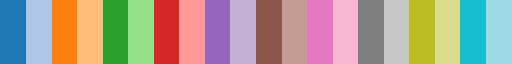

In [73]:
cmap

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

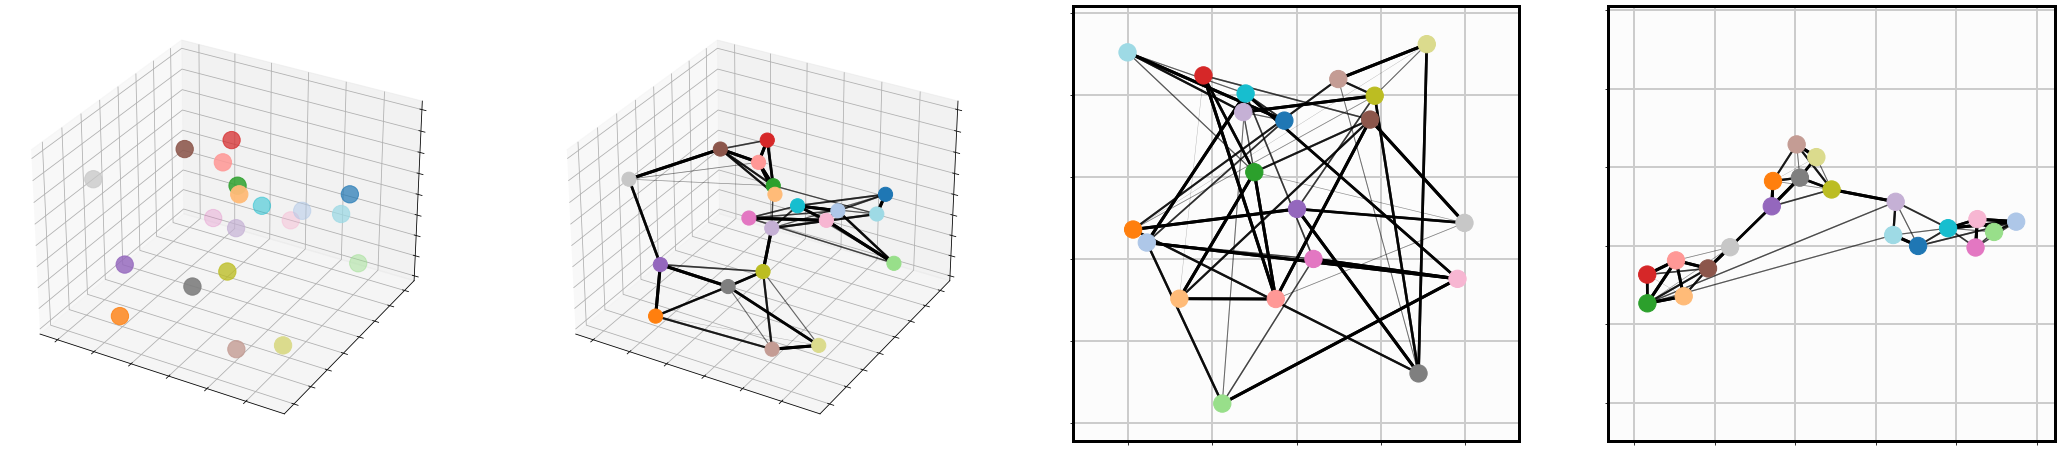

In [76]:
node_size = 300
cmap = custommap # plt.cm.tab20c# plt.cm.brg # plt.cm.Dark2
cmap = plt.cm.tab20
ncols = 4
zm = 8
padding = 0.05
cluster_id = np.arange(len(data))

fig = plt.figure(figsize=(ncols*zm*1.15,zm))

# Initial data
ax1 = fig.add_subplot(1,ncols,1, projection='3d')
ax1.scatter(data[:,0], data[:,1], data[:,2], c=cluster_id, cmap = cmap, s=node_size)
ax1.set_xticklabels([]); ax1.set_yticklabels([]); ax1.set_zticklabels([]);


### Graph on 3d
ax2  = fig.add_subplot(1,ncols,2, projection='3d')
for idx, row in tqdm(edge_df.iterrows(), total=len(edge_df), leave=False):
    st = point_df.iloc[int(row.source)].data_
    ed = point_df.iloc[int(row.target)].data_
    ax2.plot([st[0], ed[0]], [st[1], ed[1]], [st[2], ed[2]], alpha = row.weight, color= 'k', lw=row.weight*3)
ax2.set_xticklabels([]); ax2.set_yticklabels([]); ax2.set_zticklabels([]);
ax2.scatter(data[:,0], data[:,1], data[:,2], c=cluster_id, cmap = cmap, s=200, alpha = 1.0)


### Graph on 2D
ax3  = fig.add_subplot(1,ncols,3)
ax3.grid(b=True, which='major', color='#CCCCCC', linewidth=2, linestyle='-', zorder = -100)


for idx, row in tqdm(edge_df.iterrows(), total=len(edge_df), leave=False):
    st = point_df.iloc[int(row.source)].random_embedding
    ed = point_df.iloc[int(row.target)].random_embedding
    ax3.plot([st[0], ed[0]], [st[1], ed[1]], alpha = row.weight, color= 'k', lw=row.weight*3, zorder=1)
ax3.set_xticklabels([]); ax3.set_yticklabels([]);


ax3.scatter(random_embedding[:,0], random_embedding[:,1], c=cluster_id, cmap = cmap, s=node_size, zorder = 100)

ymin, ymax = ax3.get_ylim()
xmin, xmax = ax3.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax3.set_ylim(new_ylim)
ax3.set_xlim(new_xlim)
[i.set_linewidth(3) for i in ax3.spines.values()]
ax3.set_facecolor((0,0,0,0.01))
ax3.set_axisbelow(True)


### Graph on 2D
ax4  = fig.add_subplot(1,ncols,4)
ax4.grid(b=True, which='major', color='#CCCCCC', linewidth=2, linestyle='-', zorder = -100)

for idx, row in tqdm(edge_df.iterrows(), total=len(edge_df), leave=False):
    st = point_df.iloc[int(row.source)].embedding
    ed = point_df.iloc[int(row.target)].embedding
    ax4.plot([st[0], ed[0]], [st[1], ed[1]], alpha = row.weight, color= 'k', lw=row.weight*3, zorder=1)
ax4.set_xticklabels([]); ax4.set_yticklabels([]);

ax4.scatter(points[:,0], points[:,1], c=cluster_id, cmap = cmap, s=node_size, zorder = 100)


ymin, ymax = ax4.get_ylim()
xmin, xmax = ax4.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax4.set_ylim(new_ylim)
ax4.set_xlim(new_xlim)
[i.set_linewidth(3) for i in ax4.spines.values()]
#ax4.axis('off')
ax4.set_facecolor((0,0,0,0.01))
ax4.set_axisbelow(True)

#ax4.margins(0.5)

#ensure_dir(FIGURE_DIR / 'UMAP_example')
save_fig(Path('../figures') / 'embedding', save_png=True, dpi=300, save_jpg=True, save_pdf=True)

plt.show()

In [46]:
points_MDS = np.vstack(point_df.MDS_embedding.values)

  0%|          | 0/376 [00:00<?, ?it/s]

  0%|          | 0/376 [00:00<?, ?it/s]

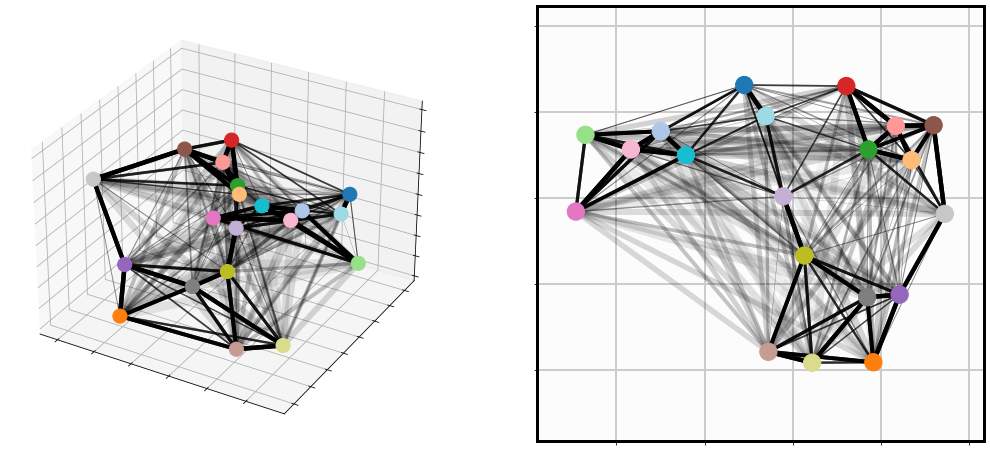

In [118]:
fig = plt.figure(figsize=(ncols*zm*1.15,zm))


### Graph on 3d
ax2  = fig.add_subplot(1,ncols,1, projection='3d')
for idx, row in tqdm(edge_df_mds.iterrows(), total=len(edge_df_mds), leave=False):
    st = point_df.iloc[int(row.source)].data_
    ed = point_df.iloc[int(row.target)].data_
    ax2.plot([st[0], ed[0]], [st[1], ed[1]], [st[2], ed[2]], alpha = row.weight, color= 'k', lw=np.log(row.weight*3)*4, zorder=1)
ax2.set_xticklabels([]); ax2.set_yticklabels([]); ax2.set_zticklabels([]);
ax2.scatter(data[:,0], data[:,1], data[:,2], c=cluster_id, cmap = cmap, s=200, alpha = 1.0)


### Graph on 2D
ax4  = fig.add_subplot(1,ncols,2)
ax4.grid(b=True, which='major', color='#CCCCCC', linewidth=2, linestyle='-', zorder = -100)

for idx, row in tqdm(edge_df_mds.iterrows(), total=len(edge_df_mds), leave=False):
    st = point_df.iloc[int(row.source)].MDS_embedding
    ed = point_df.iloc[int(row.target)].MDS_embedding
    ax4.plot([st[0], ed[0]], [st[1], ed[1]], alpha = row.weight, color= 'k', lw=np.log(row.weight*3)*4, zorder=1)
ax4.set_xticklabels([]); ax4.set_yticklabels([]);

ax4.scatter(points_MDS[:,0], points_MDS[:,1], c=cluster_id, cmap = cmap, s=node_size, zorder = 100)


ymin, ymax = ax4.get_ylim()
xmin, xmax = ax4.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax4.set_ylim(new_ylim)
ax4.set_xlim(new_xlim)
[i.set_linewidth(3) for i in ax4.spines.values()]
#ax4.axis('off')
ax4.set_facecolor((0,0,0,0.01))
ax4.set_axisbelow(True)

#ax4.margins(0.5)

#ensure_dir(FIGURE_DIR / 'UMAP_example')
#save_fig(FIGURE_DIR / 'UMAP_example' / 'dim_reduction2', save_png=True, dpi=300, save_jpg=True, save_pdf=True)
save_fig(Path('../figures') / 'mds_embedding2', save_png=True, dpi=300, save_jpg=True, save_pdf=True)

plt.show()

In [79]:
import hdbscan

In [91]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
labels = clusterer.fit(points).labels_
labels

array([0, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 0])

In [122]:
import seaborn as sns

In [124]:
pal = sns.color_palette()
pal

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

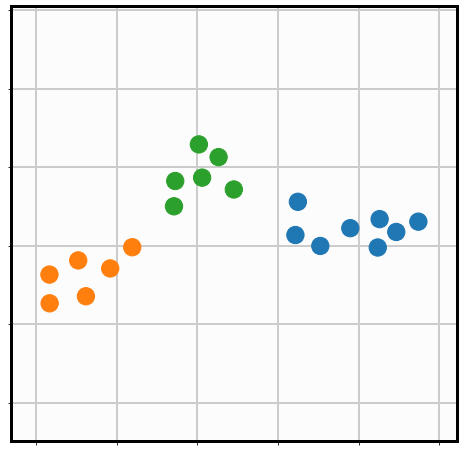

In [127]:
fig = plt.figure(figsize=(zm,zm))

ax  = fig.add_subplot(1,1,1,)
ax.grid(b=True, which='major', color='#CCCCCC', linewidth=2, linestyle='-', zorder = -100)
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_facecolor((0,0,0,0.01))
ax.scatter(points[:,0], points[:,1], c=[pal[i] if i >= 0 else "#EEEEEE" for i in clusterer.labels_], cmap = plt.cm.brg, s=node_size, zorder = 100)

[i.set_linewidth(3) for i in ax.spines.values()]

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax.set_ylim(new_ylim)
ax.set_xlim(new_xlim)

save_fig(Path('../figures') / 'hdbscan', save_png=True, dpi=300, save_jpg=True, save_pdf=True)


In [138]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=2, gen_min_span_tree=True)
labels2 = clusterer2.fit(points_MDS).labels_
labels2

array([-1,  0,  3,  1,  1,  0,  1,  1,  3,  2,  1, -1,  0,  0,  3, -1,  3,
        3,  0,  2])

In [139]:
pal2 = sns.color_palette('Set2')

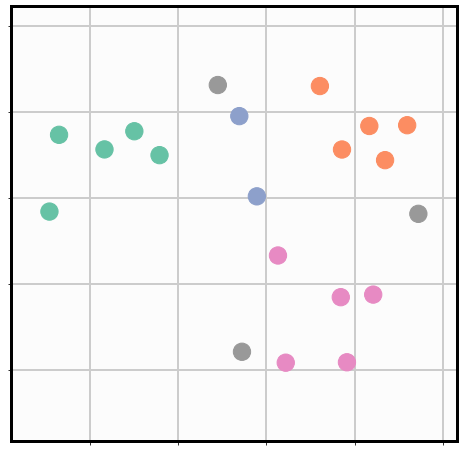

In [142]:
fig = plt.figure(figsize=(zm,zm))

ax  = fig.add_subplot(1,1,1,)
ax.grid(b=True, which='major', color='#CCCCCC', linewidth=2, linestyle='-', zorder = -100)
ax.set_xticklabels([]); ax.set_yticklabels([]);
ax.set_facecolor((0,0,0,0.01))
ax.scatter(points_MDS[:,0], points_MDS[:,1], c=[pal2[i] if i >= 0 else "#999999" for i in clusterer2.labels_], cmap = plt.cm.brg, s=node_size, zorder = 100)

[i.set_linewidth(3) for i in ax.spines.values()]

ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

new_ylim = np.array([ymin - (ymax - ymin)*padding, ymax + (ymax - ymin)*padding])
new_xlim = np.array([xmin - (xmax - xmin)*padding, xmax + (xmax - xmin)*padding])
if np.diff(new_xlim) > np.diff(new_ylim):
    new_ylim = [
        new_ylim[0] - (np.diff(new_xlim) - np.diff(new_ylim)) /2,
        new_ylim[1] + (np.diff(new_xlim) - np.diff(new_ylim)) /2
               ]
elif np.diff(new_xlim) < np.diff(new_ylim):
    new_xlim = [
        new_xlim[0] - (np.diff(new_ylim) - np.diff(new_xlim)) /2,
        new_xlim[1] + (np.diff(new_ylim) - np.diff(new_xlim)) /2
               ]
ax.set_ylim(new_ylim)
ax.set_xlim(new_xlim)

save_fig(Path('../figures') / 'hdbscan_mds', save_png=True, dpi=300, save_jpg=True, save_pdf=True)
